# Customer Churn Prediction 
## Problem Statement:
The problem of churn is a problem when a number of individuals move out of a collective group. It is one of the main problems that determine the steady-state level of customers in any type of business.
Recently a large number of customers has left Telecom. To address this problem Telecom provides customer data to solve two important tasks:


### Descriptive task: 
Characterize loyal and churn customers and propose a focused customer retention program. (This can be done through visualization, descriptive models etc.)
 

### Predictive task: 
Find a model that identifies churn customers. 

Then:
- Select 300 customers using that model from a separate test set and report the number of true churn customers among them.
- Calculate the expected costs for  Telecom for one month when using your model on the test set if: every customer predicted as churn will get a gift of 10 euro and every true churn customer predicted as loyal will cause a loss of 64 euros (an average month subscription).

In [375]:
import pandas as pd 
import numpy as np 
from scipy import stats

# # Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [376]:
# Import the dataset
data = pd.read_csv('../data/churn-train.csv')

# Data Exploration

**Data exploration findings:**
- The Churn feature is our target variable. It is a string with values 'Yes' or 'No'. 

- There are 10 duplicate rows in the data set. It is normal to have duplicated rows since we don't have a customer ID, thus some customers may have the same features.

- The data set contains several categorical variables, which are the object type.

- The SeniorCitizen feature represents if a customer is a senior citizen (i.e. age range < 67), where 1=True and 0=False. Let's convert it to object type and replace 0 with 'No' and 1 with 'Yes'.

- The totalCharges feature is the total amount charged to the customer. We need to convert it to numerical data type. Also, there are 6 missing values in the totalCharges feature, containg "?". We need to remove them as well.

In [377]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.2,No
1,Male,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,0,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,0,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,0,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.9,No
5,Male,0,No,No,3,Yes,No,'Fiber optic',No,No,No,No,No,Yes,Month-to-month,Yes,'Electronic check',80.35,253.8,No
6,Male,0,Yes,Yes,9,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service','Two year',No,'Mailed check',19.60,197.4,No
7,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,Yes,No,No,No,No,'Two year',Yes,'Bank transfer (automatic)',54.20,3838.2,No
8,Male,0,No,No,46,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,'Credit card (automatic)',45.20,2065.15,No
9,Female,0,Yes,No,67,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,'One year',No,'Mailed check',75.10,5064.45,No


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


In [379]:
# Check for duplicated rows 
data.duplicated().sum()


10

In [380]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [381]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1423
TotalCharges        4429
Churn                  2
dtype: int64

In [382]:
for col in data.columns:
    print(f'\n{col} : {data[col].unique()}')
    print(f'{col} : {data[col].dtype}')


gender : ['Male' 'Female']
gender : object

SeniorCitizen : [0 1]
SeniorCitizen : int64

Partner : ['Yes' 'No']
Partner : object

Dependents : ['Yes' 'No']
Dependents : object

tenure : [61 72  5 49  8  3  9 67 46 55 33 62  1 14 18 64 69 71 66  2 11 47 35 32
 60 29 21 48 43 20 31 38 12  6 42 45 28  7 25 40 27 10  4 68 57 26 17 59
 30 50 15 70 53 56 24 39 13 41 44 34 23 52 16 36 65 58 37 63 22 19 51 54
  0]
tenure : int64

PhoneService : ['No' 'Yes']
PhoneService : object

MultipleLines : ["'No phone service'" 'Yes' 'No']
MultipleLines : object

InternetService : ['DSL' "'Fiber optic'" 'No']
InternetService : object

OnlineSecurity : ['Yes' 'No' "'No internet service'"]
OnlineSecurity : object

OnlineBackup : ['No' 'Yes' "'No internet service'"]
OnlineBackup : object

DeviceProtection : ['Yes' 'No' "'No internet service'"]
DeviceProtection : object

TechSupport : ['No' 'Yes' "'No internet service'"]
TechSupport : object

StreamingTV : ['No' 'Yes' "'No internet service'"]
StreamingTV : 

## Data Preprocessing

In [383]:
# Correct the data types of the features
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # coerce will replace the error with NaN
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0:'No',1:'Yes'})
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [384]:
# Check for missing values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [385]:
# drop nan values
data.dropna(inplace = True)

In [386]:
# check again for missing values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis (EDA)

In [387]:
# Create numeric & categorical lists
numeric_cols = []
categoric_cols = []

for col in data.columns:
    if data[col].dtype == 'object':
        # print(f'{col} : {data[col].unique()}')
        categoric_cols.append(col)
    else:
        # print(f'{col} : {data[col].dtype}')
        numeric_cols.append(col)


print('Numerical columns:', numeric_cols)
print('Categorical columns:', categoric_cols)

Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [388]:
# Summary statistics for numerical columns of the data
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,4689.000000,4689.000000,4689.000000
mean,32.347196,64.314651,2267.644594
std,24.498419,30.182483,2264.227662
min,1.000000,18.250000,18.850000
25%,9.000000,35.000000,398.550000
50%,29.000000,70.100000,1387.350000
75%,55.000000,89.750000,3744.050000
max,72.000000,118.750000,8684.800000


## Churn Analysis

Churn
No     3437
Yes    1252
Name: count, dtype: int64


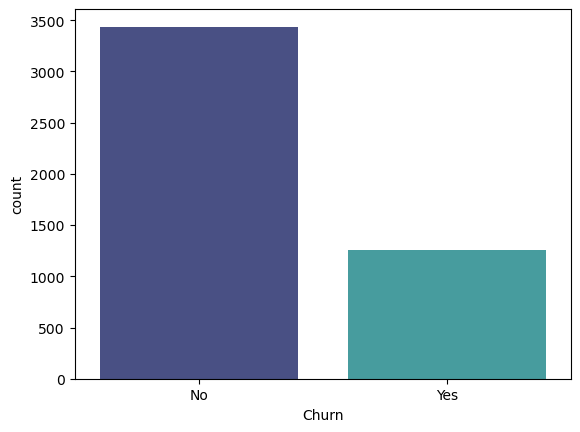

In [389]:
# # Countplot of churn feature
print(data['Churn'].value_counts())

sns.countplot(data, x='Churn', palette='mako')
plt.show()


In [390]:
len(data[data['Churn'] == 'Yes']) / len(data) * 100

26.70078908082747

- The 26.62% are churned customers and the 73.37% are loyal customers.

* **The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.**

## Numerical Feature Analysis

In [391]:
# Groupby Churn by total charges, monthly charges, tenure.
data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

tenure                                                      \
        count       mean        std  min   25%   50%    75%   max   
Churn                                                               
No     3437.0  37.560081  24.046683  1.0  15.0  38.0  61.00  72.0   
Yes    1252.0  18.036741  19.526209  1.0   2.0  10.0  29.25  72.0   

      MonthlyCharges            ...               TotalCharges               \
               count      mean  ...   75%     max        count         mean   
Churn                           ...                                           
No            3437.0  60.87764  ...  88.0  118.75       3437.0  2539.357550   
Yes           1252.0  73.74996  ...  94.0  118.35       1252.0  1521.736102   

                                                                   
               std    min       25%       50%        75%      max  
Churn                                                              
No     2331.079803  18.90  566.1000  1686.150  4200.2500  8672.45  
Yes    1878.135389  18.85  129.0875   685.975  2368.5625  8684.80  

[2 rows x 24 columns]

In [392]:
data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.560081,60.87764,2539.357550
Yes,18.036741,73.74996,1521.736102


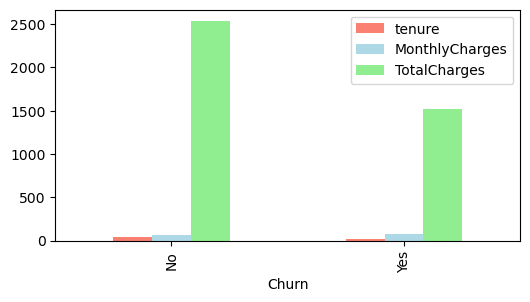

In [393]:
data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().plot(kind='bar', figsize=(6, 3), color=['salmon', 'lightblue', 'lightgreen']);

This barplot shows the average tenure (months of contract), MonthlyCharges and TotalCharges for churned and loyal customers. 
- The average tenure for churned customers is lower than loyal customers.

- We can see that the average monthly charges for churned customers is higher than loyal customers. 

- The average TotalCharges for churned customers is lower than loyal customers. This is because the churned customers have a shorter tenure than loyal customers.

### Distribution of Numerical Features

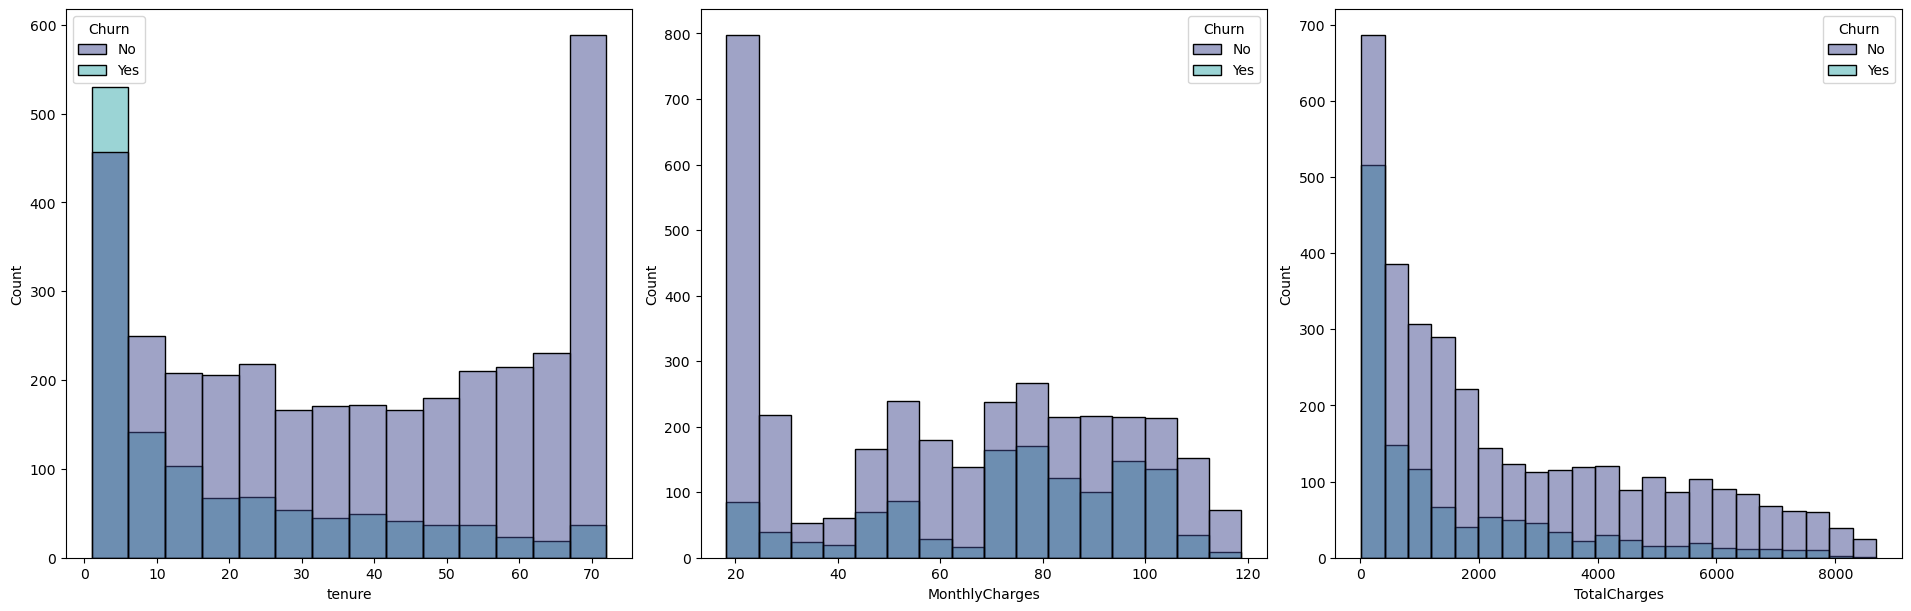

In [394]:
fig, ax = plt.subplots(1, 3, figsize=(19, 6), constrained_layout=True)
sns.histplot(data, x='tenure', hue='Churn', ax=ax[0], palette='mako')
sns.histplot(data, x='MonthlyCharges', hue='Churn', ax=ax[1], palette='mako')
sns.histplot(data, x='TotalCharges', hue='Churn', ax=ax[2], palette='mako')
plt.show()


### Pairplot of numerical features

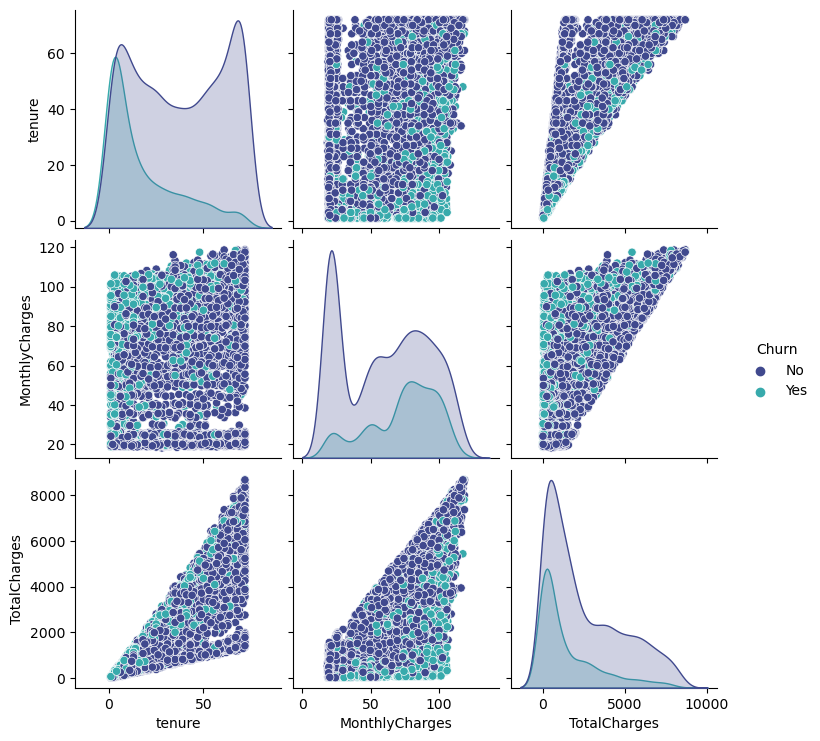

In [395]:
# Pairplot of numerical features (Hue as Churn)
sns.pairplot(data, hue='Churn', palette='mako')
plt.show()


### Correlation Heatmap of Numerical Features

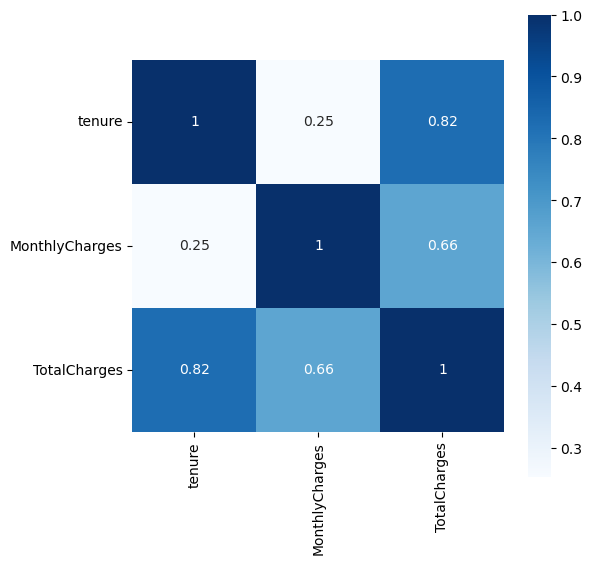

In [396]:
corr_matrix = data[numeric_cols].corr()

plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, square=True, fmt='.2g', cmap='Blues')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### ANOVA F-Statistic for numerical variables

In [397]:
# H0: There is no significant difference between the means of the groups
# H1: There is a significant difference between the means of the groups

X_train_num = data.select_dtypes(include=np.number)
y_train = data['Churn']

# Calculate the F Statistic and corresponding p value
f_stat, p_value = f_classif(X_train_num, y_train)

# Create a dataframe to store the results
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': f_stat, 'p values': p_value.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table['H0'] = ANOVA_F_table['p values'].apply(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0')

ANOVA_F_table

,Numerical_Feature,F-Score,p values,H0
0,tenure,665.424376,0.0,Reject H0
1,TotalCharges,192.958759,0.0,Reject H0
2,MonthlyCharges,173.045401,0.0,Reject H0


All numerical features are statistically significant since the p-value is less than 0.05. That means that the numerical features are correlated with the target variable.

### Outliers Detection & Treatment

In [398]:
# Outlier detection with z-score method
# z = (X - mean) / std 
# z_thresh = 3 is a common value for removing outliers

print("Before dropping numerical outliers, length of the dataframe is: ",len(data))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
data_without_outliers = drop_numerical_outliers(data)
print("After dropping numerical outliers, length of the dataframe is: ",len(data))



Before dropping numerical outliers, length of the dataframe is:  4689
After dropping numerical outliers, length of the dataframe is:  4689


No outliers were detected in the numerical features. If we reduce the z_threshold to 2, we will have 2 outliers in the MonthlyCharges feature. However, we will not remove them since they are not extreme values, and the dataset size is small.

### Dropping Highly Correlated Features (corr > 0.9)

In [399]:
print("The original dataframe has {} columns.".format(data.shape[1]))

# Calculate the correlation matrix and take the absolute value
corr_matrix = data[numeric_cols].corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

data = data.drop(to_drop, axis=1)
print('drop col', to_drop)
print("The reduced dataframe has {} columns.".format(data.shape[1]))

The original dataframe has 20 columns.
drop col []
The reduced dataframe has 20 columns.


## Categorical Features Analysis

### Chi-Squared Test for Categorical Variables

In [400]:
# Chi-square test of independence
# H0: There is no relationship between the variables
# H1: There is a relationship between the variables
# Fail to reject H0 if p-value > 0.05 means there is no relationship between the variables
# Reject H0 if p-value < 0.05 means there is a relationship between the variables

# Create a function to perform chi-square test of independence
def chi_square_test_of_independence(data, target, categorical_cols, alpha=0.05):
    chi2_check = []
    p_value = []
    dof = []

    for i in categorical_cols:
        if stats.chi2_contingency(pd.crosstab(data[i], data[target]))[1] < alpha:
            chi2_check.append('Reject H0')
        else:
            chi2_check.append('Fail to reject H0')
        p_value.append(stats.chi2_contingency(pd.crosstab(data[i], data[target]))[1])
        dof.append(stats.chi2_contingency(pd.crosstab(data[i], data[target]))[2])

    chi_square_test = pd.DataFrame({'Categorical Variable': categorical_cols, 'Chi2-Test': chi2_check, 'P-Value': p_value, 'Degree of Freedom': dof})
    chi_square_test.sort_values(by='P-Value', ascending=True, inplace=True)
    chi_square_test.reset_index(drop=True, inplace=True)
    return chi_square_test

# Perform chi-square test of independence
chi_square_test_of_independence(data, 'Churn', categoric_cols)


,Categorical Variable,Chi2-Test,P-Value,Degree of Freedom
0,Churn,Reject H0,0.000000e+00,1
1,Contract,Reject H0,3.629788e-165,2
2,OnlineSecurity,Reject H0,1.252690e-121,2
3,TechSupport,Reject H0,7.431541e-111,2
4,InternetService,Reject H0,1.426903e-100,2
5,OnlineBackup,Reject H0,1.052875e-87,2
6,PaymentMethod,Reject H0,1.128570e-86,3
7,DeviceProtection,Reject H0,1.085143e-80,2
8,StreamingMovies,Reject H0,3.469448e-54,2
9,StreamingTV,Reject H0,4.486132e-53,2


PhoneService and gender fail to reject the null hypothesis, which means that they are not correlated with the target variable. We will drop them from the data set.

The rest of the categorical features are statistically significant since the p-value is less than 0.05. That means that the categorical features are correlated with the target variable.

In [401]:
# There is not relation of PhoneService and gender with churn, thus we can drop them
categoric_cols.remove('PhoneService')
categoric_cols.remove('gender')

drop_cols = ['gender', 'PhoneService']
data.drop(drop_cols, axis=1, inplace=True)

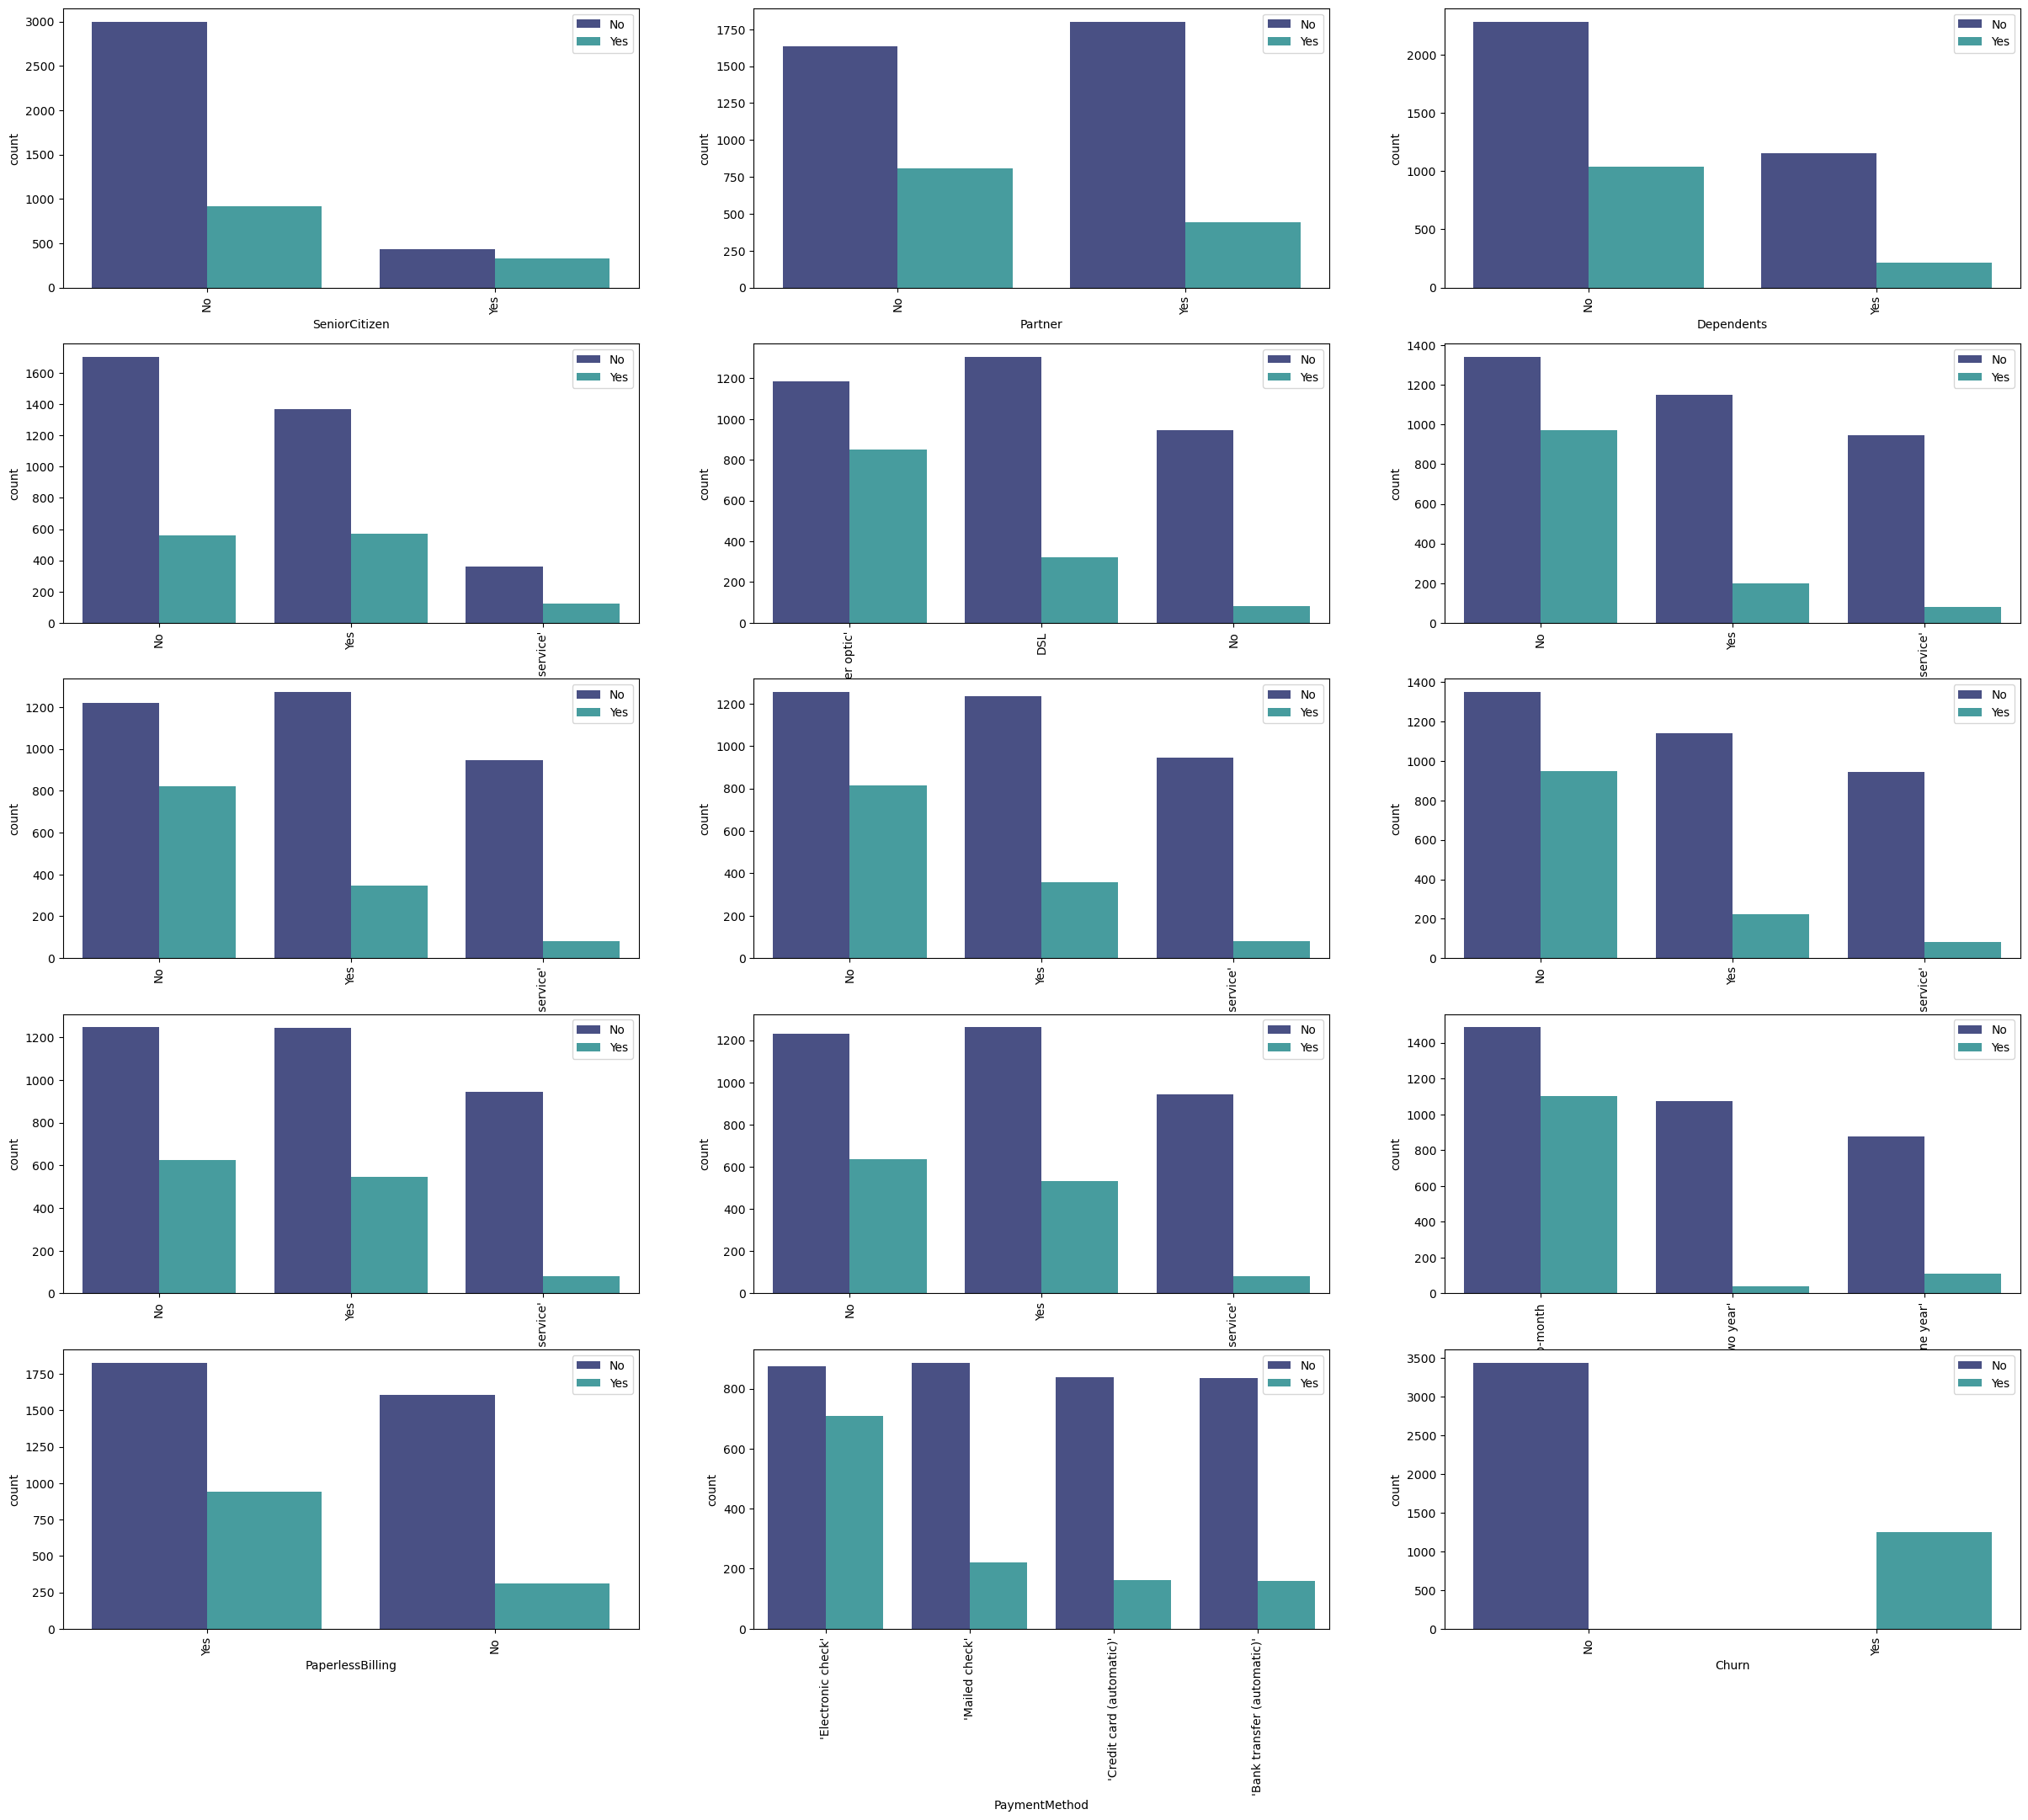

In [402]:
# for i in categoric_cols:
#     plt.figure(figsize=(6, 3))
#     sns.countplot(data=data, x=i, hue='Churn', order=data[i].value_counts().index , palette='mako')
#     plt.xticks(rotation=0)
#     plt.legend(loc='upper right')
#     plt.show()

# Grid View
fig, ax = plt.subplots(5, 3, figsize=(30, 25))
for i, subplot in zip(categoric_cols, ax.flatten()):
    sns.countplot(data=data, x=i, hue='Churn', order=data[i].value_counts().iloc[0:15].index , palette='mako', ax=subplot)
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90)
    subplot.legend(loc='upper right')


* From the plot about the Customer Contract, we obtain that those customers with "Month-to-Month" Contract are leaving the company (Churn).

* Also, from the plot about the Paperless Billing we can see that more customers that have Paperless Billing are Churn than those without. 

* From the PaymentMethod barplot, we can notice that there are more Churn customers with Electronic Check as Payment method than customers with other payment methods.

* A worth mentioned information from the graphs is that there are significantly more Churn customers without Online Security and without Tech Support. Furthermore, Customers with Fiber-optic Internet service are keen to leave the company.


# Data Encoding

### Dummy variable encoding for categorical features
We need to convert the categorical features to numerical features (i.e. dummy variables) for the predictive task.


In [403]:
# Transforming "Churn" feature rows into 0 and 1.
data['Churn'] = data['Churn'].map({'No':0, 'Yes':1}).astype('int')
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,Yes,61,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.20,0
1,No,Yes,Yes,72,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,0
2,No,No,No,5,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,0
3,No,No,No,49,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,0
4,No,No,No,8,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.90,0


In [404]:
# create dummy variables for categorical features
data = pd.get_dummies(data)

data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,61,33.60,2117.20,0,True,False,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False
1,72,90.45,6565.85,0,True,False,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
2,5,84.00,424.75,0,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,49,67.40,3306.85,0,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,8,19.70,168.90,0,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


# Feature Scaling for numerical Features

In [406]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(data[columns].values.reshape(-1,1))

for i in data.select_dtypes(include=[np.number]).columns:
    data[i] = scaling(i)
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0.845070,0.152736,0.242137,0.0,True,False,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False
1,1.000000,0.718408,0.755486,0.0,True,False,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
2,0.056338,0.654229,0.046838,0.0,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,0.676056,0.489055,0.379416,0.0,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0.098592,0.014428,0.017315,0.0,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


# Train-Test Split

In [408]:
# Split the data into train and test sets
X = data.drop(['Churn'],axis=1)
y = data['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [409]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3751, 938, 3751, 938)

# Over-sampling for class imbalance in "Churn" feature

In [47]:
data['Churn'].value_counts()

Churn
0.0    931
1.0    504
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=123)

# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=120)


In [49]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [50]:
print(X_train_over.shape)
print(y_train_over.shape)

(1504, 45)
(1504,)


In [51]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (1148, 45)
Before OverSampling, the shape of y_train: (1148,)
After OverSampling, the shape of X_train_over: (1504, 45)
After OverSampling, the shape of y_train_over: (1504,)


In [52]:
y_train_over.value_counts()

Churn
1.0    752
0.0    752
Name: count, dtype: int64

# Modeling

In [53]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)
y_pred = log_reg.predict(X_test)
print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))


Accuracy score of Logistic Regression Classifier on test set: 0.70
Confusion matrix of Logistic Regression Classifier on test set:
 [[120  59]
 [ 26  82]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.82      0.67      0.74       179
         1.0       0.58      0.76      0.66       108

    accuracy                           0.70       287
   macro avg       0.70      0.71      0.70       287
weighted avg       0.73      0.70      0.71       287



In [54]:
# cross validation
cv_scores = cross_val_score(log_reg, X_train_over, y_train_over, cv=10)
print('Cross validation accuracy scores of Logistic Regression Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Logistic Regression Classifier on training set: {:.2f}'.format(cv_scores.mean()))


Cross validation accuracy scores of Logistic Regression Classifier on training set:
 [0.7218543  0.72847682 0.71523179 0.63576159 0.68666667 0.70666667
 0.74666667 0.70666667 0.68       0.70666667]
Mean cross validation accuracy score of Logistic Regression Classifier on training set: 0.70


In [55]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over, y_train_over)
y_pred = rf_clf.predict(X_test)
print('Accuracy score of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Random Forest Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Random Forest Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(rf_clf, X_train_over, y_train_over, cv=10)
print('Cross validation accuracy scores of Random Forest Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Random Forest Classifier on training set: {:.2f}'.format(cv_scores.mean()))



Accuracy score of Random Forest Classifier on test set: 0.69
Confusion matrix of Random Forest Classifier on test set:
 [[142  37]
 [ 53  55]]
Classification report of Random Forest Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.73      0.79      0.76       179
         1.0       0.60      0.51      0.55       108

    accuracy                           0.69       287
   macro avg       0.66      0.65      0.65       287
weighted avg       0.68      0.69      0.68       287

Cross validation accuracy scores of Random Forest Classifier on training set:
 [0.84768212 0.82781457 0.8410596  0.74834437 0.76666667 0.85333333
 0.87333333 0.88666667 0.85333333 0.90666667]
Mean cross validation accuracy score of Random Forest Classifier on training set: 0.84


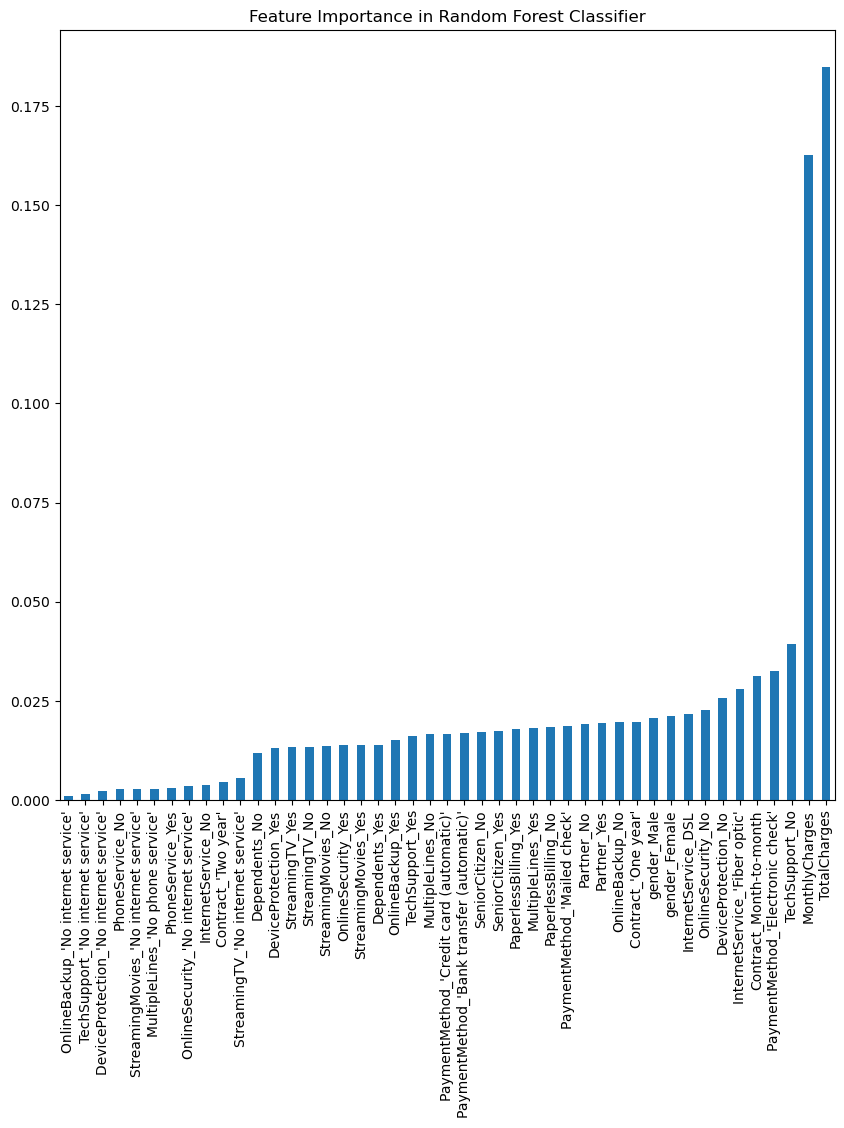

In [56]:
plt.figure(figsize=(15, 5))
weights_RF = pd.Series(rf_clf.feature_importances_,index=X.columns)
weights_RF.sort_values(ascending=True).plot(kind='bar', figsize=(10, 10))
plt.title('Feature Importance in Random Forest Classifier')
plt.show()


In [57]:
# Choose the best features from Random Forest Classifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_over, y_train_over)
sel.get_support()

selected_feat= X_train_over.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)



Index(['MonthlyCharges', 'TotalCharges', 'gender_Male',
       'InternetService_'Fiber optic'', 'OnlineSecurity_No', 'TechSupport_No',
       'Contract_Month-to-month', 'PaymentMethod_'Electronic check''],
      dtype='object')


In [58]:
# Logistic Regression with selected features
log_reg = LogisticRegression()
log_reg.fit(X_train_over[selected_feat], y_train_over)
y_pred = log_reg.predict(X_test[selected_feat])
print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(log_reg, X_train_over[selected_feat], y_train_over, cv=10)
print('Cross validation accuracy scores of Logistic Regression Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Logistic Regression Classifier on training set: {:.2f}'.format(cv_scores.mean()))


Accuracy score of Logistic Regression Classifier on test set: 0.71
Confusion matrix of Logistic Regression Classifier on test set:
 [[122  57]
 [ 26  82]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.82      0.68      0.75       179
         1.0       0.59      0.76      0.66       108

    accuracy                           0.71       287
   macro avg       0.71      0.72      0.71       287
weighted avg       0.74      0.71      0.72       287

Cross validation accuracy scores of Logistic Regression Classifier on training set:
 [0.75496689 0.73509934 0.73509934 0.64900662 0.69333333 0.68666667
 0.72666667 0.70666667 0.72       0.70666667]
Mean cross validation accuracy score of Logistic Regression Classifier on training set: 0.71


In [59]:
# Hyperparameter tuning for Logistic Regression with GridSearchCV
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=10)
log_reg_cv.fit(X_train_over[selected_feat], y_train_over)
print('Tuned Logistic Regression Parameters: {}'.format(log_reg_cv.best_params_))
print('Best score is {}'.format(log_reg_cv.best_score_))



Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.7134083885209713


In [60]:
# Logistic Regression with tuned hyperparameters
log_reg = LogisticRegression(C=10)
log_reg.fit(X_train_over[selected_feat], y_train_over)
y_pred = log_reg.predict(X_test[selected_feat])

print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(log_reg, X_train_over[selected_feat], y_train_over, cv=10)
print('Cross validation accuracy scores of Logistic Regression Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Logistic Regression Classifier on training set: {:.2f}'.format(cv_scores.mean()))


Accuracy score of Logistic Regression Classifier on test set: 0.72
Confusion matrix of Logistic Regression Classifier on test set:
 [[124  55]
 [ 26  82]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.83      0.69      0.75       179
         1.0       0.60      0.76      0.67       108

    accuracy                           0.72       287
   macro avg       0.71      0.73      0.71       287
weighted avg       0.74      0.72      0.72       287

Cross validation accuracy scores of Logistic Regression Classifier on training set:
 [0.73509934 0.7218543  0.72847682 0.63576159 0.69333333 0.68
 0.72666667 0.70666667 0.70666667 0.70666667]
Mean cross validation accuracy score of Logistic Regression Classifier on training set: 0.70


In [61]:
# Random Forest Classifier with selected features
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over[selected_feat], y_train_over)
y_pred = rf_clf.predict(X_test[selected_feat])
print('Accuracy score of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Random Forest Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Random Forest Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(rf_clf, X_train_over[selected_feat], y_train_over, cv=10)
print('Cross validation accuracy scores of Random Forest Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Random Forest Classifier on training set: {:.2f}'.format(cv_scores.mean()))



Accuracy score of Random Forest Classifier on test set: 0.68
Confusion matrix of Random Forest Classifier on test set:
 [[142  37]
 [ 56  52]]
Classification report of Random Forest Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       179
         1.0       0.58      0.48      0.53       108

    accuracy                           0.68       287
   macro avg       0.65      0.64      0.64       287
weighted avg       0.67      0.68      0.67       287

Cross validation accuracy scores of Random Forest Classifier on training set:
 [0.82119205 0.8013245  0.77483444 0.78807947 0.72666667 0.84666667
 0.84       0.89333333 0.84666667 0.86      ]
Mean cross validation accuracy score of Random Forest Classifier on training set: 0.82


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve for Logistic Regression Classifier and Random Forest Classifier
log_reg = LogisticRegression()
log_reg.fit(X_train_over[selected_feat], y_train_over)
y_pred_prob1 = log_reg.predict_proba(X_test[selected_feat])[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over[selected_feat], y_train_over)
y_pred_prob2 = rf_clf.predict_proba(X_test[selected_feat])[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)



* The ROC curve illustrates the true positive rate against the false positive rate of our classifier.
* The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case. 

In [66]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_over[selected_feat], y_train_over)
y_pred = xgb_clf.predict(X_test[selected_feat])
print('Accuracy score of XGBoost Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of XGBoost Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of XGBoost Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(xgb_clf, X_train_over[selected_feat], y_train_over, cv=10)
print('Cross validation accuracy scores of XGBoost Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of XGBoost Classifier on training set: {:.2f}'.format(cv_scores.mean()))

# precision 
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)



Accuracy score of XGBoost Classifier on test set: 0.67
Confusion matrix of XGBoost Classifier on test set:
 [[139  40]
 [ 55  53]]
Classification report of XGBoost Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       179
         1.0       0.57      0.49      0.53       108

    accuracy                           0.67       287
   macro avg       0.64      0.63      0.64       287
weighted avg       0.66      0.67      0.66       287

Cross validation accuracy scores of XGBoost Classifier on training set:
 [0.81456954 0.82119205 0.8013245  0.79470199 0.71333333 0.85333333
 0.84666667 0.88666667 0.78666667 0.83333333]
Mean cross validation accuracy score of XGBoost Classifier on training set: 0.82


0.5698924731182796

In [64]:
# # ROC curve for XGBoost Classifier
# xgb_clf = XGBClassifier()
# xgb_clf.fit(X_train_over[selected_feat], y_train_over)
y_pred_prob = xgb_clf.predict_proba(X_test[selected_feat])[:,1]
fpr3 , tpr3, thresholds = roc_curve(y_test, y_pred_prob)



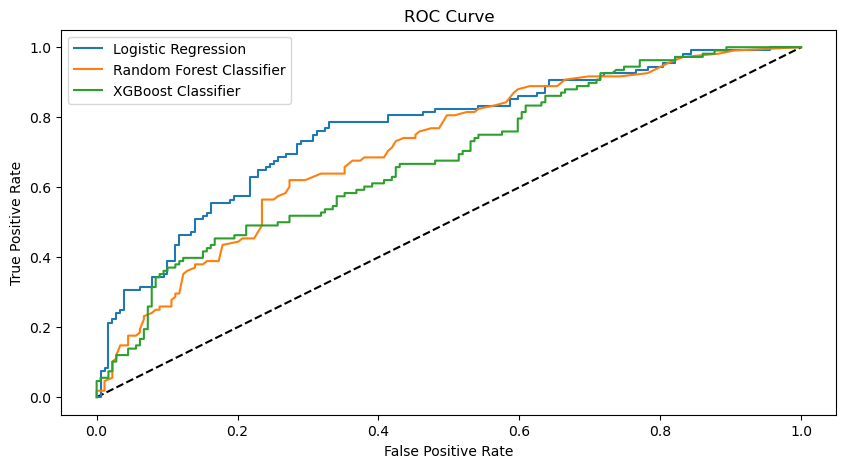

In [65]:
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Random Forest Classifier')
plt.plot(fpr3, tpr3, label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Explainable AI (XAI)

Shap values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. 

* SHAP Summary plot: The summary plot shows the most important features in our data set, ordered by the sum of SHAP value magnitudes over all samples. The color represents the feature value (red high, blue low). This reveals for example that a high Contract_Month-to-month implies a higher probability of churn.

* Bee Swarm plot: The bee swarm plot shows the individual data points for the top features. The x-axis is the SHAP value of that feature scaled to be between 0 (blue) and 1 (red). This reveals for example that a high MonthlyCharges implies a higher probability of churn.

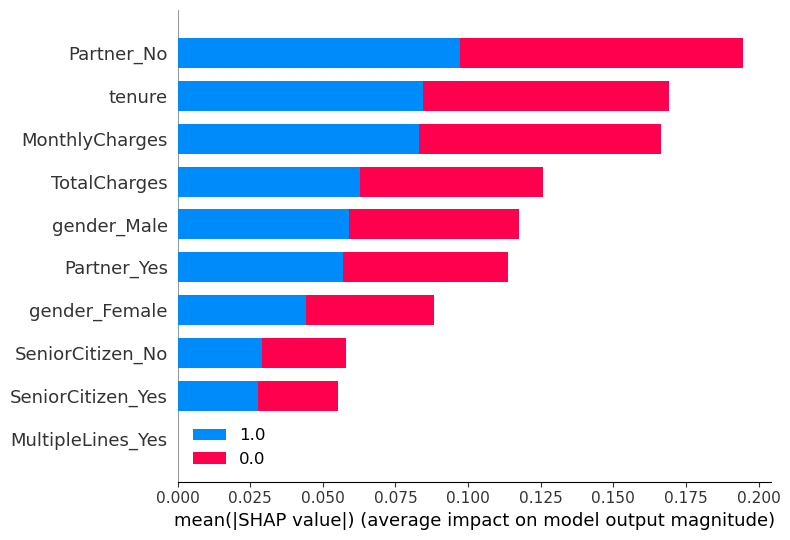

In [119]:
import shap 


explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,plot_type='bar',max_display=10,class_names=rf_clf.classes_)

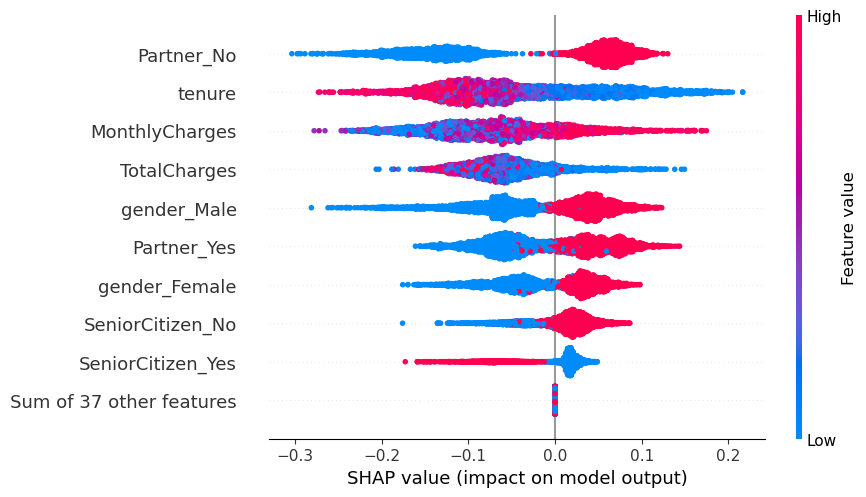

In [120]:
explainer = shap.TreeExplainer(rf_clf)
shap_values1 = explainer(X)
shap_values1.values = shap_values1.values[:,:,1]
shap_values1.base_values = shap_values1.base_values[:,1]

shap.plots.beeswarm(shap_values1)

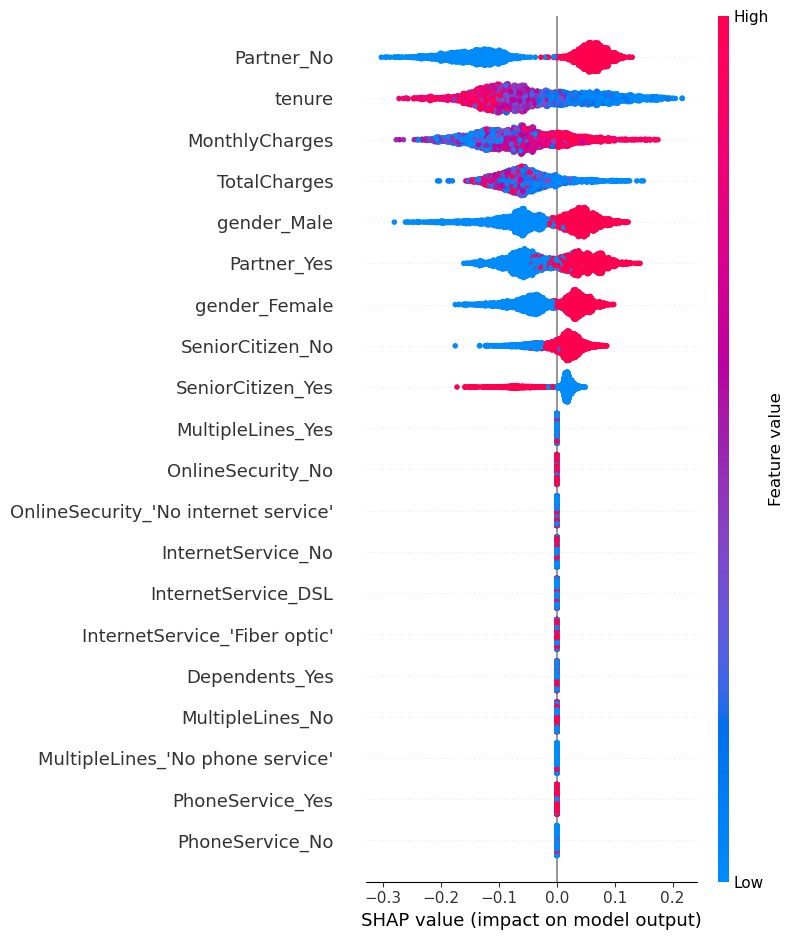

In [121]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_train, approximate=False, check_additivity=False)
shap.summary_plot(shap_values[1], X_train)

# Test data - New unseen Customer data

In [84]:
new_customer = pd.read_csv('../data/churn-test.csv')

In [85]:
# Apply the preprocessing steps
new_customer.TotalCharges = pd.to_numeric(new_customer.TotalCharges, errors='coerce')

# drop duplicate rows
new_customer.drop_duplicates(inplace=True)

# drop nan values
new_customer.dropna(inplace=True)

new_customer.Churn = pd.Series(np.where(new_customer.Churn.values == "Yes",1,0), new_customer.index)

new_customer['SeniorCitizen'] = new_customer['SeniorCitizen'].replace({0:'No',1:'Yes'})
new_customer['SeniorCitizen'] = new_customer['SeniorCitizen'].astype('object')

new_customer = pd.get_dummies(new_customer)


In [72]:
# check nan values
new_customer.isna().sum()


tenure                                       0
MonthlyCharges                               0
TotalCharges                                 0
Churn                                        0
gender_Female                                0
gender_Male                                  0
SeniorCitizen_No                             0
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  0
Dependents_No                                0
Dependents_Yes                               0
PhoneService_No                              0
PhoneService_Yes                             0
MultipleLines_'No phone service'             0
MultipleLines_No                             0
MultipleLines_Yes                            0
InternetService_'Fiber optic'                0
InternetService_DSL                          0
InternetService_No                           0
OnlineSecurity_'No internet service'         0
OnlineSecurit

In [74]:
# Predict the probability of churn for new customers
new_customer['Churn_Probability'] = rf_clf.predict_proba(new_customer[selected_feat])[:,1]
new_customer['Churn_Prediction'] = rf_clf.predict(new_customer[selected_feat])

new_customer.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check',Churn_Probability,Churn_Prediction
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,True,False,True,False,False,True,False,0.28,0.0
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,False,False,False,True,0.31,0.0
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,True,False,False,False,True,0.22,0.0
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,0.46,0.0
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,0.39,0.0


In [81]:
# evaluate the model
print('Accuracy score of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(new_customer['Churn'], new_customer['Churn_Prediction'])))
print('Confusion matrix of Random Forest Classifier on test set:\n', confusion_matrix(new_customer['Churn'], new_customer['Churn_Prediction']))
print('Classification report of Random Forest Classifier on test set:\n', classification_report(new_customer['Churn'], new_customer['Churn_Prediction']))

# cross validation
cv_scores = cross_val_score(rf_clf, new_customer[selected_feat], new_customer['Churn'], cv=10)
print('Cross validation accuracy scores of Random Forest Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Random Forest Classifier on training set: {:.2f}'.format(cv_scores.mean()))


Accuracy score of Random Forest Classifier on test set: 0.71
Confusion matrix of Random Forest Classifier on test set:
 [[1658   66]
 [ 608    6]]
Classification report of Random Forest Classifier on test set:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83      1724
           1       0.08      0.01      0.02       614

    accuracy                           0.71      2338
   macro avg       0.41      0.49      0.42      2338
weighted avg       0.56      0.71      0.62      2338

Cross validation accuracy scores of Random Forest Classifier on training set:
 [0.7991453  0.75213675 0.76495726 0.76923077 0.80769231 0.79487179
 0.83760684 0.79487179 0.77682403 0.78111588]
Mean cross validation accuracy score of Random Forest Classifier on training set: 0.79


In [83]:
# how many of the churned customers did we catch from the new customers?
new_customer[new_customer['Churn'] == 1]['Churn_Prediction'].value_counts()


Churn_Prediction
0.0    608
1.0      6
Name: count, dtype: int64

In [79]:
new_customer.sample(frac=0.5)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check',Churn_Probability,Churn_Prediction
1335,2,45.00,96.45,1,False,True,True,False,True,False,...,False,True,False,True,False,False,False,True,0.20,0.0
2232,36,19.45,754.50,0,False,True,True,False,False,True,...,True,False,True,False,False,True,False,False,0.18,0.0
1702,21,104.40,2200.25,1,True,False,True,False,False,True,...,False,True,False,True,True,False,False,False,0.43,0.0
1178,15,101.35,1553.95,1,False,True,True,False,True,False,...,False,True,False,True,False,False,True,False,0.35,0.0
64,9,94.40,857.25,1,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,0.39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,3,86.85,220.95,1,True,False,False,True,True,False,...,False,True,False,True,False,False,True,False,0.39,0.0
459,1,75.10,75.10,0,False,True,True,False,True,False,...,False,True,False,True,False,False,True,False,0.39,0.0
1212,7,69.55,521.35,0,False,True,True,False,True,False,...,False,True,False,True,False,False,True,False,0.39,0.0
1230,47,87.20,4017.45,0,False,True,True,False,False,True,...,False,True,True,False,False,False,True,False,0.39,0.0


In [80]:
# show the churn customers
new_customer[new_customer['Churn_Prediction'] == 1]

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check',Churn_Probability,Churn_Prediction
57,66,108.45,7076.35,0,False,True,False,True,False,True,...,False,False,False,True,False,False,True,False,0.71,1.0
102,38,95.00,3605.60,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,0.56,1.0
170,43,84.25,3539.25,0,False,True,True,False,False,True,...,False,False,False,True,True,False,False,False,0.88,1.0
200,27,101.90,2681.15,0,True,False,True,False,False,True,...,False,False,False,True,False,True,False,False,0.88,1.0
205,33,79.95,2684.85,0,True,False,True,False,True,False,...,False,False,False,True,True,False,False,False,0.56,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,52,104.45,5481.25,0,False,True,False,True,False,True,...,False,False,False,True,True,False,False,False,0.88,1.0
2297,54,110.35,5893.15,1,True,False,True,False,False,True,...,False,False,True,False,False,False,True,False,0.71,1.0
2313,43,104.30,4451.85,0,False,True,True,False,False,True,...,False,False,False,True,False,True,False,False,0.56,1.0
2326,72,109.15,7789.60,0,True,False,True,False,False,True,...,False,False,True,False,False,True,False,False,0.56,1.0


In [76]:
# total number of customers and churned customers
total_customers = len(new_customer)
churned_customers = len(new_customer[new_customer['Churn_Prediction'] == 1])

print('Total number of customers: {}'.format(total_customers))
print('Total number of churned customers: {}'.format(churned_customers))


Total number of customers: 2338
Total number of churned customers: 72
